You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.


<font>**Step 4. Exploratory data analysis**</font>

In [1]:
import pandas as pd
df1 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_01.csv')
df1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
df1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [4]:
df1.duplicated().sum()

0

In [2]:
df4 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_04.csv')
df4

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [6]:
df4.duplicated().sum()

0

In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
df4['average_trips'] = df4['average_trips'].astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
df4.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


In [10]:
dfTOP1 = df1.sort_values(by = 'trips_amount', ascending = False).head(10)
dfTOP1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [11]:
dfTOP4 = df4.sort_values(by = 'average_trips', ascending = False).head(10)
dfTOP4

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

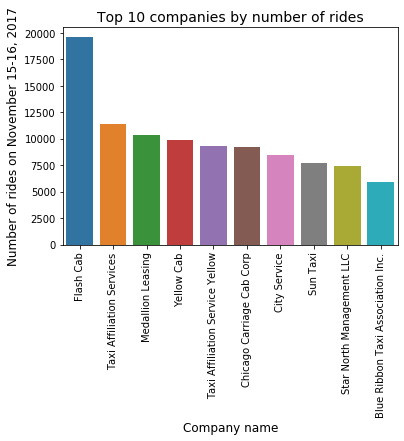

In [13]:
sns.barplot(data = dfTOP1
            ,x = 'company_name'
            ,y = 'trips_amount'
            )
plt.xticks(rotation=90, size =10)
plt.xlabel('Company name', size = 12)
plt.ylabel('Number of rides on November 15-16, 2017', size = 12)
plt.title("Top 10 companies by number of rides", size = 14);

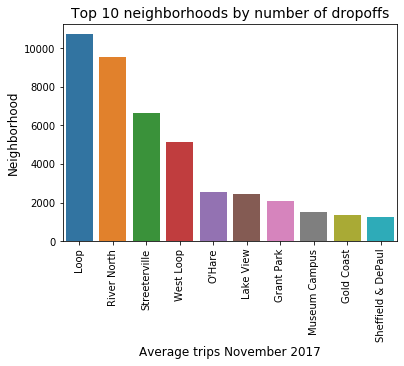

In [14]:
sns.barplot(data = dfTOP4
            ,x = 'dropoff_location_name'
            ,y = 'average_trips'
            )
plt.xticks(rotation=90, size =10)
plt.xlabel('Average trips November 2017', size = 12)
plt.ylabel('Neighborhood', size = 12)
plt.title("Top 10 neighborhoods by number of dropoffs", size = 14);

<font color = 'purple'>**Conclusion**</font>

We imported data, saw that there is no missing values, checked for duplicates, changed data type of average_trips to int, built graphs from which we can see that Flash Cab is a leading company in amount of rides on 15-16 November and  top leading neighborhoods by dropoffs are Loop and River North

<font>**Step 5. Testing hypotheses**</font>

In [3]:
df7 = pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_07.csv')
df7

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
df7['start_ts'] = pd.to_datetime(df7['start_ts'], format='%Y.%m.%d %H:%M:%S')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [18]:
df7['weekday'] = df7['start_ts'].dt.dayofweek
df7

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [19]:
df7.duplicated().sum()

197

In [20]:
df7.loc[df7.duplicated()]

,start_ts,weather_conditions,duration_seconds,weekday
62,2017-11-11 06:00:00,Good,1260.0,5
74,2017-11-11 08:00:00,Good,1380.0,5
76,2017-11-04 09:00:00,Good,1380.0,5
117,2017-11-11 07:00:00,Good,1380.0,5
119,2017-11-04 14:00:00,Good,3300.0,5
...,...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0,5
1058,2017-11-25 12:00:00,Good,1440.0,5
1062,2017-11-11 06:00:00,Good,1500.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5


In [21]:
df7 = df7.drop_duplicates().reset_index(drop = True)
df7.shape

(871, 4)

<font color = 'purple'>**Test the hypothesis:**</font>

**"The average duration of rides from Loop neighborhood to O'Hare
International Airport changes on rainy Sundays."**

So the **hypothesis Null** is - The average duration of rides from Loop neighborhood to O'Hare International Airport is **the same** on rainy and sunny Sundays. The **alternative hypothesis** is  - The average duration of rides from Loop neighborhood to O'Hare International Airport on rainy Sundays **differs** from sunny Sundays. We figured out there is no data on Sundays, so we will compare **Saturdays**. We want to know if variances are equal or not, so we ll use Levene’s Test, it showed us that **variances are equal** and we ll use the standart alpha value 0.05 The Shapiro test showed us that **distibution of slices are not normal** so it is better to use Mann-whitney test. The test result is **null hypotheses is rejected**. It means that Average duration of rides from Loop neighborhood to O'Hare International Airport on **sunny days and on rainy days are not equal**. 

In [22]:
sunday = df7.query('weekday == 6')
sunday

,start_ts,weather_conditions,duration_seconds,weekday


In [23]:
sunny = df7.query('weekday == 5 and weather_conditions == "Good"')
sunny

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
864,2017-11-04 12:00:00,Good,2492.0,5
865,2017-11-11 10:00:00,Good,1303.0,5
866,2017-11-04 14:00:00,Good,2700.0,5
868,2017-11-25 11:00:00,Good,0.0,5


In [24]:
rainy = df7.query('weekday == 5 and weather_conditions == "Bad"')
rainy

,start_ts,weather_conditions,duration_seconds,weekday
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5
...,...,...,...,...
846,2017-11-18 12:00:00,Bad,2560.0,5
847,2017-11-18 10:00:00,Bad,1908.0,5
861,2017-11-18 12:00:00,Bad,2400.0,5
867,2017-11-18 16:00:00,Bad,2186.0,5


In [25]:
from scipy.stats import shapiro

shapiro(sunny['duration_seconds'])

(0.9172313213348389, 1.9105948955050754e-19)

In [26]:
from scipy.stats import shapiro

shapiro(rainy['duration_seconds'])

(0.9786325097084045, 0.02081223390996456)

In [27]:
from scipy import stats as st
import numpy as np
st.levene(sunny['duration_seconds'], rainy['duration_seconds'], center = 'median')

LeveneResult(statistic=0.000586951625283602, pvalue=0.9806770360671218)

In [28]:
import scipy.stats as stats

alpha = .05
results = stats.mannwhitneyu(sunny['duration_seconds'], rainy['duration_seconds'], alternative='two-sided')
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.263763308570752e-09
We reject the null hypothesis


In [29]:
sunny.duration_seconds.median()

1883.0

In [30]:
rainy.duration_seconds.median()

2463.5

<font color = 'purple'>**Conclusion**</font>

From exploring the data, we see that passengers choose Flash Cab company.

The most popular neighborhoods to go are Loop and River North.

Bad weather conditions such as rain and storm have impact, increasing the duration of ride.

